<a href="https://colab.research.google.com/github/hrstnikolov/machine-learning-2022/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gradient Descent Walkthrough

## An example

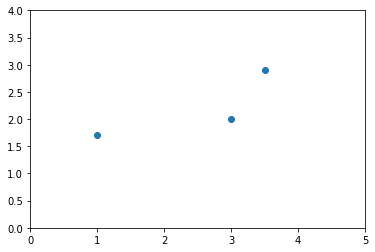

In [101]:
# Define observed data and plot.

data = np.array([
    [1, 1.7],
    [3, 2],
    [3.5, 2.9],
])

x = data[:, 0]
y = data[:, 1]

def plot_data(color='C0'):
    plt.scatter(x, y, c=color)
    plt.xlim([0, 5])
    plt.ylim([0, 4])

plot_data()

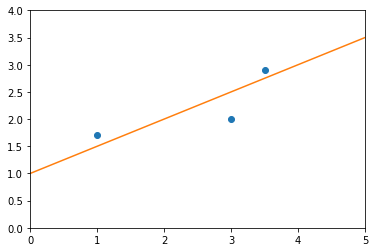

In [94]:
# Create model func creator and plot an example

def create_model_func(a, b):
    """a, b"""
    return np.vectorize(lambda x: a * x + b)
    
dummy_model = create_model_func(a=0.5, b=1)

model_x = np.array([0, 5])
model_y = dummy_model(model_x)

def plot_model(color='C1'):
    plt.plot(model_x, model_y, c=color)


plot_data()
plot_model()

[1.5  2.5  2.75]


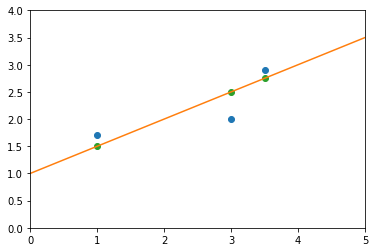

In [114]:
# Calc predicted output y tilda

y_pred = dummy_model(x)

def plot_y_pred(color='C2'):
    plt.scatter(x, y_pred, c=color)

print(y_pred)
plot_data()
plot_model()
plot_y_pred()

In [71]:
# Define loss func and calculate it for each input `x` in the data

def loss(y_pred, y_obs):
    return (y_pred - y_obs) ** 2

loss = np.vectorize(loss)

losses = loss(y_pred=y_pred, y_obs=y)
losses

array([0.04  , 0.25  , 0.0225])

In [102]:
# Define cost func and calculate it for the particular loss values
# This cost is for model coeffs a = 0.5 and b = 1

def cost(losses):
    return np.mean(losses)

the_cost = cost(losses)
the_cost

0.10416666666666664

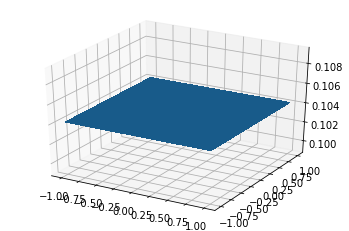

In [74]:
# Plot a surface for the cost func (as to my knowledge matplotlib can't plot a single plot)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

a = [-1, 1]
b = [-1, 1]
a = np.array(a)
b = np.array(b)
a, b = np.meshgrid(a, b)

the_cost = np.array([[the_cost]])

surf = ax.plot_surface(a, b, the_cost, linewidth=0, antialiased=False)
plt.show()

## Multiple `a` and `b`

In [106]:
# Define new vectorized cost func to work with multiple `a` and `b` coeffs

def calculate_cost(a, b):
    model_func = create_model_func(a, b)
    y_pred = model_func(x)
    losses = loss(y_pred, y)
    the_cost = cost(losses)
    return the_cost

calculate_cost = np.vectorize(calculate_cost)

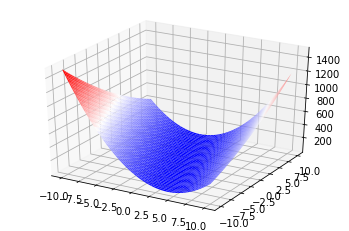

In [113]:
# Calculate the cost in several points and plot the 3d plot for [a, b, cost]

a = np.linspace(-10, 10, 50)
b = np.linspace(-10, 10, 50)
a, b = np.meshgrid(a, b)
the_cost = calculate_cost(a, b)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(a, b, the_cost, cmap='bwr')
plt.show()

In [117]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


for x in [1.5, 2.5, 2.75]:
    print(x, sigmoid(x))

1.5 0.8175744761936437
2.5 0.9241418199787566
2.75 0.9399133498259924
